In [52]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 加载数据
mnist数据保存在 ```/home/kevin/dataset/MNSIT``` 的文件夹中

In [53]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/home/kevin/dataset/MNIST/', validation_size=0)

Extracting /home/kevin/dataset/MNIST/train-images-idx3-ubyte.gz
Extracting /home/kevin/dataset/MNIST/train-labels-idx1-ubyte.gz
Extracting /home/kevin/dataset/MNIST/t10k-images-idx3-ubyte.gz
Extracting /home/kevin/dataset/MNIST/t10k-labels-idx1-ubyte.gz


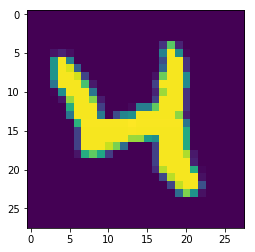

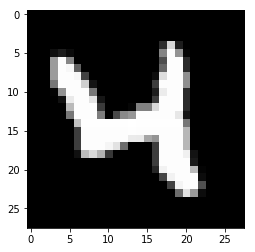

In [54]:
img = mnist.train.images[20]
plt.figure()
plt.imshow(img.reshape((28,28)))
plt.figure()
plt.imshow(img.reshape((28,28)), cmap='Greys_r')
plt.show()

## 构造AutoEncoder
我们实现一个最简单的模型，即包括三个部分：
* 输入层
* 隐藏层
* 输出层

In [55]:
# basic parameters
hidden_units = 64
input_units = mnist.train.images.shape[1]

## 输入层
由于AutoEncoder是对源输入的复现，因此这里的输出层与输入层数据相同

In [56]:
inputs_ = tf.placeholder(tf.float32, shape=(None, input_units), name='inputs_')
targets_ = tf.placeholder(tf.float32, shape=(None, input_units), name='tragets_')

## 隐藏层

In [57]:
hidden_ = tf.layers.dense(inputs=inputs_, units=hidden_units, activation=tf.nn.relu)

## 输出层

In [58]:
logits_ = tf.layers.dense(inputs=hidden_, units=input_units, activation=None)
outputs_ = tf.sigmoid(logits_, name='outputs_')

## 损失函数

In [59]:
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits_)
cost = tf.reduce_mean(loss)

## 优化函数

In [60]:
learning_rate = 0.01
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

## 训练

In [61]:
sess = tf.InteractiveSession()

In [62]:
epoch = 100
batch_size = mnist.train.num_examples
sess.run(tf.global_variables_initializer())
total_batch = mnist.train.num_examples // batch_size
for ep in range(epoch):
    for batch in range(total_batch):
        batch_xs,_ = mnist.train.next_batch(batch_size=batch_size)
        batch_cost, _ = sess.run([cost, optimizer],
                                 feed_dict = {inputs_: batch_xs,
                                              targets_: batch_xs})
        print('Epoch:%s/%s, batch:%s/%s, Training loss:%.4f' %(ep+1, epoch, batch+1, total_batch, batch_cost))

Epoch:1/100, batch:1/1, Training loss:0.6944
Epoch:2/100, batch:1/1, Training loss:0.6022
Epoch:3/100, batch:1/1, Training loss:0.4672
Epoch:4/100, batch:1/1, Training loss:0.3622
Epoch:5/100, batch:1/1, Training loss:0.3221
Epoch:6/100, batch:1/1, Training loss:0.3111
Epoch:7/100, batch:1/1, Training loss:0.3066
Epoch:8/100, batch:1/1, Training loss:0.3011
Epoch:9/100, batch:1/1, Training loss:0.2940
Epoch:10/100, batch:1/1, Training loss:0.2890
Epoch:11/100, batch:1/1, Training loss:0.2823
Epoch:12/100, batch:1/1, Training loss:0.2743
Epoch:13/100, batch:1/1, Training loss:0.2664
Epoch:14/100, batch:1/1, Training loss:0.2596
Epoch:15/100, batch:1/1, Training loss:0.2542
Epoch:16/100, batch:1/1, Training loss:0.2492
Epoch:17/100, batch:1/1, Training loss:0.2438
Epoch:18/100, batch:1/1, Training loss:0.2384
Epoch:19/100, batch:1/1, Training loss:0.2334
Epoch:20/100, batch:1/1, Training loss:0.2292
Epoch:21/100, batch:1/1, Training loss:0.2259
Epoch:22/100, batch:1/1, Training loss:0.22

## 查看复现结果

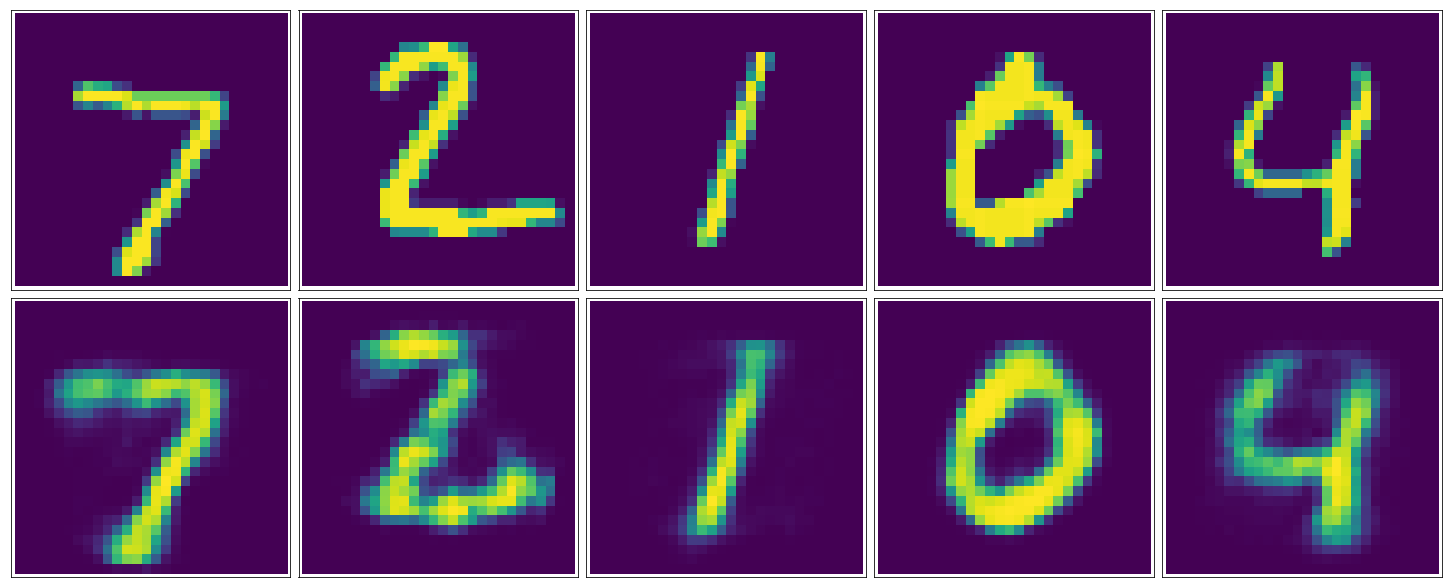

In [63]:
# 绘图
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(20,8))
test_imgs = mnist.test.images[:5]
reconstructed, compressed = sess.run([outputs_, hidden_],
                                      feed_dict={inputs_: test_imgs})

for image, row in zip([test_imgs, reconstructed], axes):
    for img, ax in zip(image, row):
        ax.imshow(img.reshape((28,28)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
fig.tight_layout(pad=0.1)

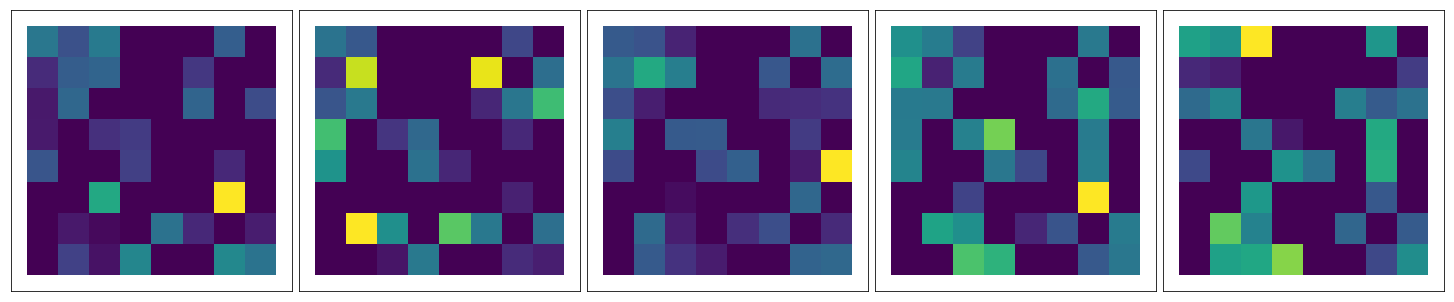

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(20,4))
for img, ax in zip(compressed, axes):
    ax.imshow(img.reshape(8,8))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
fig.tight_layout(pad=0)

In [65]:
sess.close()